# Day 16: Proboscidea Volcanium

https://adventofcode.com/2022/day/16
    
## The problem
You're in a volcano with an estimated time of 30 minutes until it erupts. Release the maximum amount of pressure using these valves. It takes one minute to travel between valves and one minute to open a valve. Go!

Select example or puzzle.

In [1]:
example = False

<hr>

## Grok data

In [2]:
if example:
    infostr = '''Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II'''
    
else:
    infostr = '''Valve GS has flow rate=0; tunnels lead to valves KB, GW
Valve CB has flow rate=0; tunnels lead to valves GW, CT
Valve TP has flow rate=0; tunnels lead to valves LR, TH
Valve FI has flow rate=3; tunnels lead to valves DA, AY, ZO, MP, XP
Valve WV has flow rate=0; tunnels lead to valves TH, HG
Valve EA has flow rate=16; tunnels lead to valves PL, NG, AX
Valve AT has flow rate=9; tunnels lead to valves ZO, EM
Valve WS has flow rate=0; tunnels lead to valves GW, RD
Valve MP has flow rate=0; tunnels lead to valves AA, FI
Valve GE has flow rate=0; tunnels lead to valves AX, QN
Valve SA has flow rate=10; tunnels lead to valves NI, OM, RD, RC, GO
Valve NI has flow rate=0; tunnels lead to valves SA, YG
Valve GO has flow rate=0; tunnels lead to valves TH, SA
Valve IT has flow rate=0; tunnels lead to valves WB, KB
Valve NG has flow rate=0; tunnels lead to valves EA, KF
Valve RD has flow rate=0; tunnels lead to valves SA, WS
Valve LR has flow rate=12; tunnels lead to valves TP, XR
Valve TO has flow rate=22; tunnel leads to valve VW
Valve WF has flow rate=0; tunnels lead to valves XX, OO
Valve YD has flow rate=21; tunnel leads to valve NR
Valve XR has flow rate=0; tunnels lead to valves LR, KB
Valve KF has flow rate=0; tunnels lead to valves GW, NG
Valve OO has flow rate=0; tunnels lead to valves UD, WF
Valve HG has flow rate=0; tunnels lead to valves WV, YG
Valve CT has flow rate=0; tunnels lead to valves YG, CB
Valve DA has flow rate=0; tunnels lead to valves TH, FI
Valve YY has flow rate=0; tunnels lead to valves AA, YG
Valve VW has flow rate=0; tunnels lead to valves TO, EM
Valve RC has flow rate=0; tunnels lead to valves AA, SA
Valve PL has flow rate=0; tunnels lead to valves AA, EA
Valve TH has flow rate=14; tunnels lead to valves GO, WV, GJ, DA, TP
Valve QN has flow rate=24; tunnels lead to valves LC, GE
Valve XE has flow rate=0; tunnels lead to valves NA, XX
Valve XP has flow rate=0; tunnels lead to valves FI, OM
Valve AX has flow rate=0; tunnels lead to valves GE, EA
Valve EM has flow rate=0; tunnels lead to valves AT, VW
Valve NR has flow rate=0; tunnels lead to valves YD, PM
Valve YG has flow rate=4; tunnels lead to valves AY, HG, NI, YY, CT
Valve PM has flow rate=0; tunnels lead to valves UD, NR
Valve AY has flow rate=0; tunnels lead to valves YG, FI
Valve GJ has flow rate=0; tunnels lead to valves AA, TH
Valve LC has flow rate=0; tunnels lead to valves QN, GW
Valve UD has flow rate=17; tunnels lead to valves OO, PM
Valve AA has flow rate=0; tunnels lead to valves MP, GJ, YY, RC, PL
Valve OM has flow rate=0; tunnels lead to valves XP, SA
Valve WB has flow rate=0; tunnels lead to valves NA, IT
Valve GW has flow rate=11; tunnels lead to valves KF, GS, LC, CB, WS
Valve NA has flow rate=7; tunnels lead to valves WB, XE
Valve XX has flow rate=20; tunnels lead to valves XE, WF
Valve ZO has flow rate=0; tunnels lead to valves AT, FI
Valve KB has flow rate=8; tunnels lead to valves XR, GS, IT'''



Tabulate the provided info.

In [3]:
import pandas as pd

def organize_info(infostr):
    lines = infostr.split('\n')
    table = []
    columns = ['label', 'status', 'rate', 'leads_to']
    for line in lines:
        line = line.replace(',', '')
        word = line.split()
        row = []
        row.append(word[1])
        row.append('closed')
        row.append(int(word[4][5:-1]))
        row.append(word[9:])
        table.append(row)
    df = pd.DataFrame(table, columns = columns)
    return df

info = organize_info(infostr)

info.head()

,label,status,rate,leads_to
0,GS,closed,0,"[KB, GW]"
1,CB,closed,0,"[GW, CT]"
2,TP,closed,0,"[LR, TH]"
3,FI,closed,3,"[DA, AY, ZO, MP, XP]"
4,WV,closed,0,"[TH, HG]"


## Visualize the situation

Looks like another network graph problem. Edges are undirected, but nodes have values that decrease over time.

igraph documentation: https://igraph.readthedocs.io/en/stable/tutorial.html

In [4]:
import igraph as ig

g = ig.Graph()
g.add_vertices(info['label'].tolist())
print(g)

IGRAPH UN-- 51 0 --
+ attr: name (v)


In [5]:
info['edges'] = info.apply(lambda x: [[x.label, valve] for valve in x.leads_to], axis=1)
info.head()

,label,status,rate,leads_to,edges
0,GS,closed,0,"[KB, GW]","[[GS, KB], [GS, GW]]"
1,CB,closed,0,"[GW, CT]","[[CB, GW], [CB, CT]]"
2,TP,closed,0,"[LR, TH]","[[TP, LR], [TP, TH]]"
3,FI,closed,3,"[DA, AY, ZO, MP, XP]","[[FI, DA], [FI, AY], [FI, ZO], [FI, MP], [FI, ..."
4,WV,closed,0,"[TH, HG]","[[WV, TH], [WV, HG]]"


In [6]:
for row in info.edges:
    g.add_edges(row)
g.simplify()
print(g)

IGRAPH UN-- 51 60 --
+ attr: name (v)
+ edges (vertex names):
GS--GW, GS--KB, CB--CT, CB--GW, TP--LR, TP--TH, FI--MP, FI--DA, FI--XP,
FI--AY, FI--ZO, WV--HG, WV--TH, EA--NG, EA--PL, EA--AX, AT--EM, AT--ZO,
WS--RD, WS--GW, MP--AA, GE--QN, GE--AX, SA--NI, SA--GO, SA--RD, SA--RC,
SA--OM, NI--YG, GO--TH, IT--WB, IT--KB, NG--KF, LR--XR, TO--VW, WF--OO,
WF--XX, YD--NR, XR--KB, KF--GW, OO--UD, HG--YG, CT--YG, DA--TH, YY--YG,
YY--AA, VW--EM, RC--AA, PL--AA, TH--GJ, QN--LC, XE--NA, XE--XX, XP--OM,
NR--PM, YG--AY, PM--UD, GJ--AA, LC--GW, WB--NA


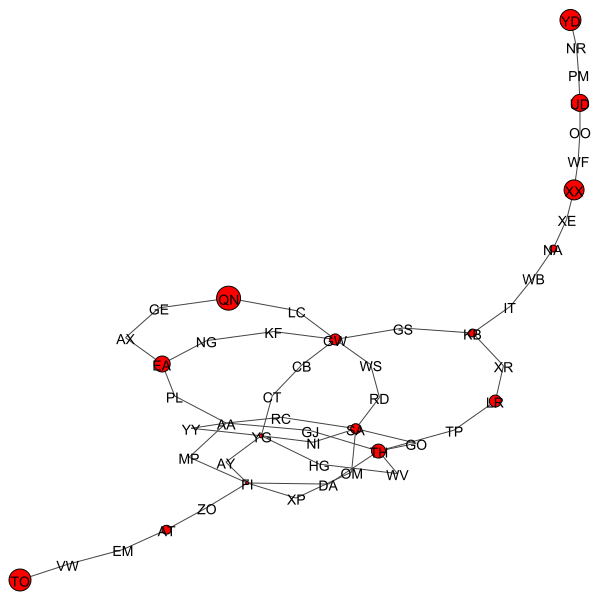

In [7]:
layout = g.layout("kk")

g.vs["label"] = g.vs["name"]
g.vs["size"] = info['rate']
# g.vs['color'] = 'pink'
# https://en.wikipedia.org/wiki/X11_color_names

ig.plot(g, layout=layout)

Well, at least now we've visualized the problem. This graph definitely helps me as a human to pick a reasonable way. But I need the BEST way. We're in a volcano, after all! With a herd of distressed elephants! And it's not clear from igraph documentation that it includes analysis tools that can deal with the value of the nodes, which decrease as we traverse the network. So I decided to read about other packages. Maybe there's a better match.

Going back to our list of libraries from the hill climbing day, let's consider NetworkX: https://networkx.org/documentation/stable/

The problem at hand seems like a variation of the traveling salesman problem, so let's start here: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.traveling_salesman.traveling_salesman_problem.html 

There's still no mention of node values and I haven't found anything promising in Google, (this is a good description of the problem, but nobody answered it https://math.stackexchange.com/questions/2062969/adjusting-the-travelling-salesman-problem-for-weighted-nodes) so let's try making up some greedy algorithm of our own. (Hey, it could work, and the elephants are expecting me to do something.)

## Strategy

1. Let's define the value of each closed node, at time t, as the total amount of pressure it could release by the deadline if we went straight there and opened it.

    value(valve) = flow rate * (minutes left - length of shortest path)
    

2. Let's define the overall goodness of our current situation as the sum of all our options.

    goodness = sum(valve values)
    

3. Let's compare, for each available tunnel, the change in overall goodness if we went that way, and choose the one that offers the best prospect.

    *recursive madness ensues*
    

4. When we reach a valve, we will compare the benefit of opening it (rate * minutes left) to the cost of doing so (rate of all closed nodes * 1 minute) 